<a href="https://colab.research.google.com/github/KhmAsif/IMSE441S2025/blob/main/Hypothesis_Testing_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing for 1 sample

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp


In [ ]:
#Example for Beerios
#H0= 9 grams, H1 /= 9
beerios = [9.16, 8.57, 9.54, 8.70, 9.33, 9.43, 8.39, 9.47, 8.66, 9.01]


In [ ]:
#Normality testing
%pip install pingouin
import pingouin as pg

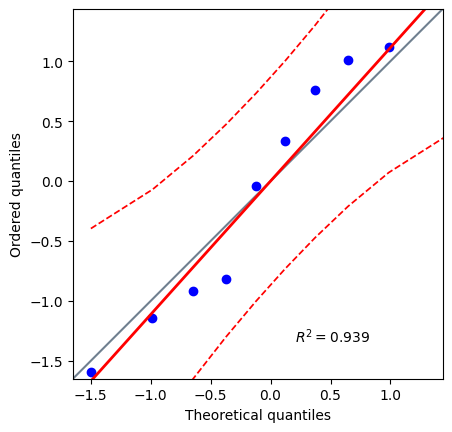

In [ ]:
pg.qqplot(beerios)
plt.show()

In [ ]:
ttest_1samp(a=beerios, popmean= 9)

TtestResult(statistic=np.float64(0.19574525062921205), pvalue=np.float64(0.8491577226110049), df=np.int64(9))

In [ ]:
t_stat, p_value= ttest_1samp(a=beerios, popmean= 9)
print(t_stat, p_value)

0.19574525062921205 0.8491577226110049


In [ ]:
if p_value < 0.05:
  print("We reject the null hypothesis")

else:
  print("We fail to rejet the null hypothesis")

We fail to rejet the null hypothesis


In [ ]:
# Confidence Interval check
CI= stats.ttest_1samp(beerios,9).confidence_interval(confidence_level=0.95)
CI

ConfidenceInterval(low=np.float64(8.725527390600051), high=np.float64(9.326472609399948))

In [ ]:
#Example Golf club
#Hypothesis  H0= 0.82, H1 > 0.82
Club= [0.8411, 0.8191, 0.8182, 0.8125, 0.8750, 0.8580, 0.8532, 0.8483, 0.8276, 0.7983, 0.8042, 0.8730, 0.8282, 0.8359, 0.8660]


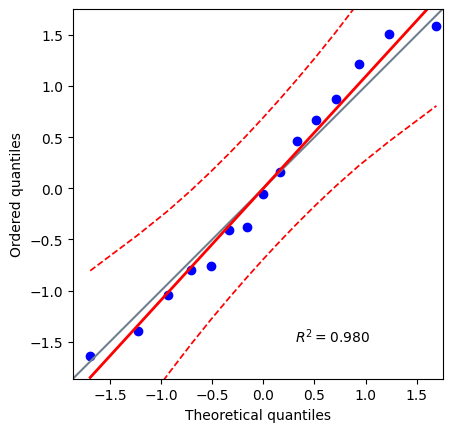

In [ ]:
#normality check
pg.qqplot(Club)
plt.show()

In [ ]:
#t_test
ttest_1samp(a=Club, popmean=0.82)

TtestResult(statistic=np.float64(2.718978782525142), pvalue=np.float64(0.016626737363021643), df=np.int64(14))

In [ ]:
# Confidence Interval check
CI= stats.ttest_1samp(Club,0.82).confidence_interval(confidence_level=0.95)
CI

ConfidenceInterval(low=np.float64(0.8236407315035582), high=np.float64(0.8508392684964418))

In [ ]:
t_stat, p_value= ttest_1samp(a=Club, popmean= 0.82)
if p_value < 0.05:
  print("We reject the null hypothesis")
else:
  print("We fail to rejet the null hypothesis")

We reject the null hypothesis


# Normal approximation of Poisson distribution

In [ ]:
import scipy.stats as stats

pop= stats.poisson.rvs(loc=18, mu= 35, size= 1500)
samp_1= stats.poisson.rvs(loc=18, mu= 35, size= 60)
samp_2= stats.poisson.rvs(loc=18, mu= 30, size= 60)

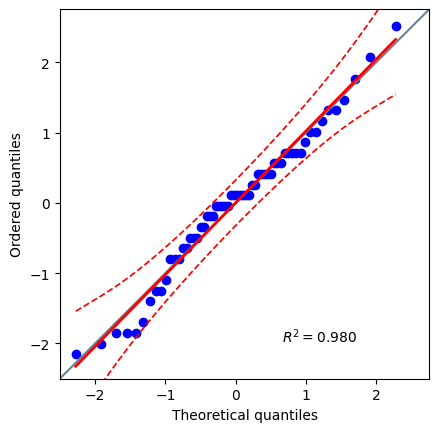

In [ ]:
#normality check
pg.qqplot(samp_1)
plt.show()

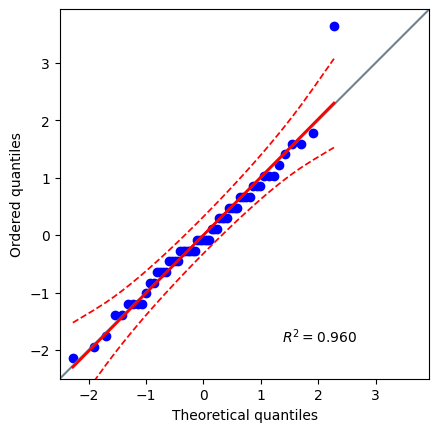

In [ ]:
#normality check
pg.qqplot(samp_2)
plt.show()

Sample with same mean as population

In [ ]:
t_stat, p_value= ttest_1samp(a=samp_1, popmean= pop.mean())
if p_value < 0.05:
  print("We reject the null hypothesis")
else:
  print("We fail to rejet the null hypothesis")

We fail to rejet the null hypothesis


Sample with same mean as population

In [ ]:
t_stat, p_value= ttest_1samp(a=samp_2, popmean= pop.mean())
if p_value < 0.05:
  print("We reject the null hypothesis")
else:
  print("We fail to rejet the null hypothesis")

We reject the null hypothesis


# Choice of sample size

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size =.52 , alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 64


In [ ]:
# Calculate Power
power = power_analysis.power(effect_size = 0.52, alpha = 0.05, nobs1=64, alternative = 'two-sided')#nobs1= sample size
# Print results
print('The power for the hypothesis testing is', round(power, 2))


The power for the hypothesis testing is 0.83


# Hypothesis testing for 2 samples Variance Equal

Two Sample test Variance equal

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#Two different catalyst performance test. Sample 2 is cheaper. Will it be a good decision to catalyst 1 by catalyst 2?
Samp_1= 91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21
Samp_2= 89.19, 90.95, 90.46,	93.21,	97.19,	97.04,	91.07,	92.75
df1=len(Samp_1)-1
df2=len(Samp_2)-1


In [ ]:
#Normality check
pg.qqplot(Samp_1)
plt.show()

In [ ]:
#Normality check
pg.qqplot(Samp_2)
plt.show()


In [ ]:
#Equal Variance check

In [ ]:
np.var(Samp_1)

In [ ]:
np.var(Samp_2)

In [ ]:
F=np.var(Samp_2)/np.var(Samp_1)
alpha=0.05
P_value=1-stats.f.cdf(F, df1, df2)
print( 'F value:', F, 'P value:', P_value)
if P_value > alpha:
  print('Fail Reject null hypothesis: Variance equal')
else :
  print ('Reject null hypothesis: Variance not equal')

**Another way**

In [ ]:
levene(Samp_1, Samp_2)

In [ ]:
#Hypothesis test
ttest_ind(a=Samp_1, b= Samp_2, equal_var= True)

TtestResult(statistic=np.float64(-0.35359086434617987), pvalue=np.float64(0.7289136186068217), df=np.float64(14.0))

Fail to reject null hypothesis. So the means are not equal

# Two Sample test Variance Unequal

In [ ]:
# two sample test Variance unequal
# Drinking water Arsenic concentration in Arizona
Samp_11 = 3, 7, 25, 10, 15, 6, 12, 25, 15, 7
Samp_21 = 48, 44, 40, 38, 33, 21, 20, 12, 1, 18
df1=len(Samp_11)-1
df2=len(Samp_21)-1

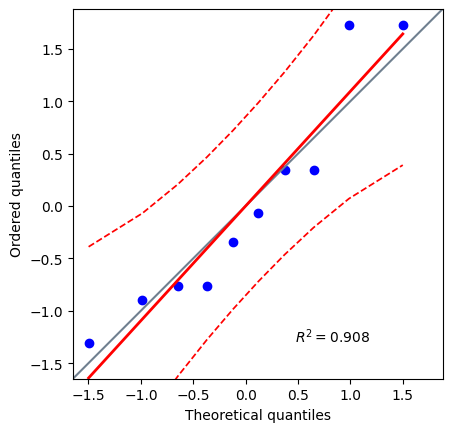

In [ ]:

#Normality check
pg.qqplot(Samp_11)
plt.show()

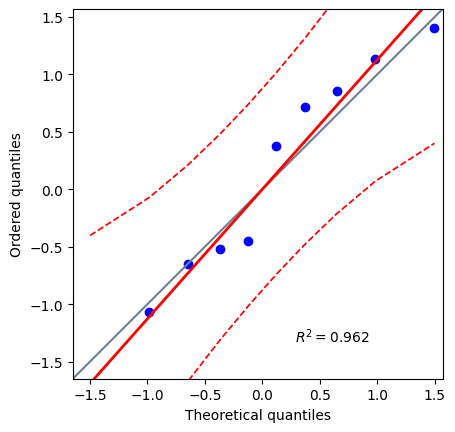

In [ ]:
#Normality check
pg.qqplot(Samp_21)
plt.show()

In [ ]:
#Equal Variance check

In [ ]:
np.var(Samp_11)

np.float64(52.45)

In [ ]:
np.var(Samp_21)

np.float64(212.05)

In [ ]:
F=np.var(Samp_21)/np.var(Samp_11)
alpha=0.05
P_value=1-stats.f.cdf(F, df1, df2)
print( 'F value:', F, 'P value:', P_value)
if P_value > alpha:
  print('Fail to null hypothesis: Variance equal')
else :
  print ('Reject null hypothesis: Variance not equal')

F value: 4.042897998093422 P value: 0.02468018343891043
Reject null hypothesis: Variance not equal


In [ ]:
from scipy.stats import levene

In [ ]:
levene(Samp_11, Samp_21)

LeveneResult(statistic=np.float64(7.7015516672169), pvalue=np.float64(0.012482954069299166))

In [ ]:
#Hypothesis test
ttest_ind(a=Samp_1, b= Samp_2, equal_var= False)

TtestResult(statistic=np.float64(-0.35359086434617987), pvalue=np.float64(0.729166024171922), df=np.float64(13.352517017672161))

# Paired t test

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
#Test of shear strength for same steel blades by two different methods
Samp_31= 1.186, 1.151, 1.322, 1.339, 1.200, 1.402, 1.365, 1.537, 1.559
Samp_32= 1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052


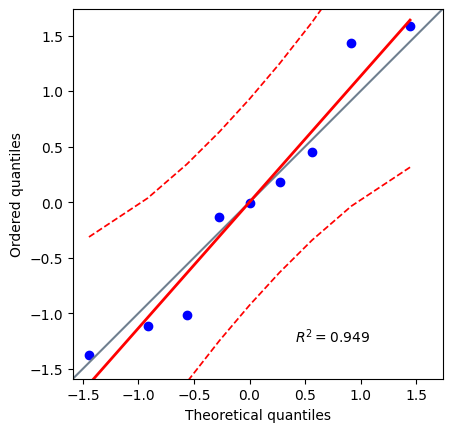

In [ ]:
#Normality check
pg.qqplot(Samp_31)
plt.show()

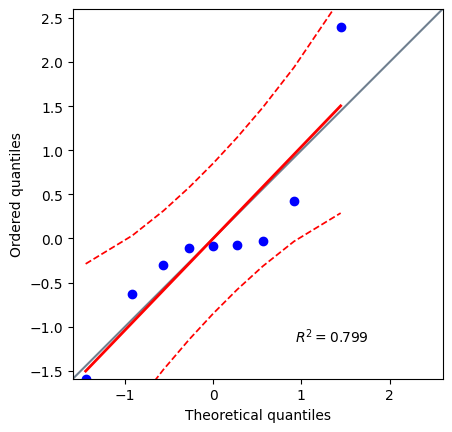

In [ ]:

#Normality check
pg.qqplot(Samp_32)
plt.show()

In [ ]:
#Hypothesis test for Paired samples
ttest_rel(a=Samp_31, b= Samp_32)

TtestResult(statistic=np.float64(6.0819394375848255), pvalue=np.float64(0.00029529546278604066), df=np.int64(8))

We reject the null hypothesis. There is difference in means even though these data are from same materials

In [ ]:
#confidence interval for Paired samples
ttest_rel(a=Samp_1, b= Samp_2).confidence_interval(confidence_level=.95)


ConfidenceInterval(low=np.float64(-4.218845412721882), high=np.float64(3.2638454127218877))